In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd//content/drive/MyDrive/Colab Notebooks/Dataset

/content/drive/MyDrive/Colab Notebooks/Dataset


In [ ]:
ls

nutrition.h5  TEST_SET/  TRAIN_SET/


### Importing Neccessary Libraries

In [ ]:
import numpy as np#used for numerical analysis
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A layer consists of a tensor-in tensor-out computation function
#Dense layer is the regular deeply connected neural network layer
from tensorflow.keras.layers import Dense,Flatten
#Faltten-used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout #Convolutional layer
#MaxPooling2D-for downsampling the image
from keras.preprocessing.image import ImageDataGenerator




### Image Data Agumentation

In [ ]:
#setting parameter for Image Data agumentation to the training data
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
#Image Data agumentation to the testing data
test_datagen=ImageDataGenerator(rescale=1./255)

### Loading our data and performing data agumentation

In [ ]:
#performing data agumentation to train data
x_train = train_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Colab Notebooks/Dataset/TRAIN_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse')
#performing data agumentation to test data
x_test = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/Colab Notebooks/Dataset/TEST_SET',
    target_size=(64, 64),batch_size=5,color_mode='rgb',class_mode='sparse') 

Found 2626 images belonging to 5 classes.
Found 1055 images belonging to 5 classes.


In [ ]:
print(x_train.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
print(x_test.class_indices)#checking the number of classes

{'APPLES': 0, 'BANANA': 1, 'ORANGE': 2, 'PINEAPPLE': 3, 'WATERMELON': 4}


In [ ]:
from collections import Counter as c
c(x_train .labels)

Counter({0: 606, 1: 445, 2: 479, 3: 621, 4: 475})

### Creating the model

In [ ]:
# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolution layer and pooling
classifier.add(Conv2D(32, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=5, activation='softmax')) # softmax for more than 2



In [ ]:
classifier.summary()#summary of our model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

### Compiling the model

In [ ]:
# Compiling the CNN
# categorical_crossentropy for more than 2
classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) 

## Fitting the model

In [ ]:
classifier.fit_generator(
        generator=x_train,steps_per_epoch = len(x_train),
        epochs=10, validation_data=x_test,validation_steps = len(x_test))# No of images in test set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
526/526 [==============================] - 795s 2s/step - loss: 0.1576 - accuracy: 0.9368 - val_loss: 0.0077 - val_accuracy: 1.0000
Epoch 2/10
526/526 [==============================] - 28s 53ms/step - loss: 6.6987e-04 - accuracy: 1.0000 - val_loss: 0.0120 - val_accuracy: 1.0000
Epoch 3/10
526/526 [==============================] - 28s 53ms/step - loss: 8.9214e-05 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 1.0000
Epoch 4/10
526/526 [==============================] - 28s 53ms/step - loss: 8.8289e-05 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 5/10
526/526 [==============================] - 28s 52ms/step - loss: 0.0637 - accuracy: 0.9832 - val_loss: 0.0331 - val_accuracy: 0.9773
Epoch 6/10
526/526 [==============================] - 27s 51ms/step - loss: 3.2515e-04 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 0.9773
Epoch 7/10
526/526 [==============================] - 28s 52ms/step - loss: 1.1964e-04 - accuracy: 1.0000 - val_loss: 0.0

### Saving our model

In [ ]:
# Save the model
classifier.save('nutrition.h5')

# Nutrition Image Analysis using CNN

### Predicting our results

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

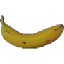

In [ ]:
img = image.load_img("/content/drive/MyDrive/Colab Notebooks/Dataset/TEST_SET/BANANA/102_100.jpg",target_size= (64,64))#loading of the image
img

In [ ]:
x=image.img_to_array(img)#conversion image into array

In [ ]:
x

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [ ]:
x.ndim

3

In [ ]:
x=np.expand_dims(x,axis=0) #expand the dimension

In [ ]:
x.ndim

4

In [ ]:
pred = classifier.predict(x)

1/1 [==============================] - 0s 123ms/step


In [ ]:
pred

array([[0., 1., 0., 0., 0.]], dtype=float32)

In [ ]:
labels=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
labels[np.argmax(pred)]

'BANANA'